In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("data/stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X=df.drop(columns=["math_score"],axis=1)

In [5]:
y=df["math_score"]

In [6]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

# create column transformers with type of transformation

In [9]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer= StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [("OneHotEncoder",oh_transformer,cat_features),
    ("StandardScaler",numeric_transformer,num_features)]
)

In [10]:
X=preprocessor.fit_transform(X)

In [12]:
X.shape

(1000, 19)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# Create an evalutaion function to give all metrics after model training

In [27]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse= mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2_square=r2_score(true,predicted)
    return mse,rmse,r2_square

In [26]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score


In [28]:
models={
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge": Ridge(),
    "K Neibours Regression" : KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "AdaBoost":AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train) # train model
    
    #make prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    #evaluate Train and Test database
    model_train_mae,model_train_rmse,model_train_r2= evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2= evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performence for Training set")
    print("-Root Mean Squared Error:{:.4f}".format(model_train_rmse))
    print("-Mean Absolute Error:{:.4f}".format(model_train_mae))
    print("-R2 Score:{:.4f}".format(model_train_r2))
    print("-------------------------------------------")
    print("Model performence for Test set")
    print("-Root Mean Squared Error:{:.4f}".format(model_test_rmse))
    print("-Mean Absolute Error:{:.4f}".format(model_test_mae))
    print("-R2 Score:{:.4f}".format(model_test_r2))
    print("-------------------------------------------")
    
    r2_list.append(model_test_r2)
    print('='*35)
    print("\n")

LinearRegression
Model performence for Training set
-Root Mean Squared Error:5.3293
-Mean Absolute Error:28.4013
-R2 Score:0.8740
-------------------------------------------
Model performence for Test set
-Root Mean Squared Error:5.4252
-Mean Absolute Error:29.4326
-R2 Score:0.8790
-------------------------------------------


Lasso
Model performence for Training set
-Root Mean Squared Error:6.5938
-Mean Absolute Error:43.4784
-R2 Score:0.8071
-------------------------------------------
Model performence for Test set
-Root Mean Squared Error:6.5197
-Mean Absolute Error:42.5064
-R2 Score:0.8253
-------------------------------------------


Ridge
Model performence for Training set
-Root Mean Squared Error:5.3233
-Mean Absolute Error:28.3378
-R2 Score:0.8743
-------------------------------------------
Model performence for Test set
-Root Mean Squared Error:5.3904
-Mean Absolute Error:29.0563
-R2 Score:0.8806
-------------------------------------------


K Neibours Regression
Model perform

# Results

In [30]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.879046
5,RandomForestRegressor,0.852606
7,AdaBoost,0.849289
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K Neibours Regression,0.783813
4,DecisionTreeRegressor,0.759820


# linear Regression model 

In [31]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.90


In [32]:
rid_model=Ridge(fit_intercept=True)
rid_model=rid_model.fit(X_train,y_train)
y_pred=rid_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.06


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

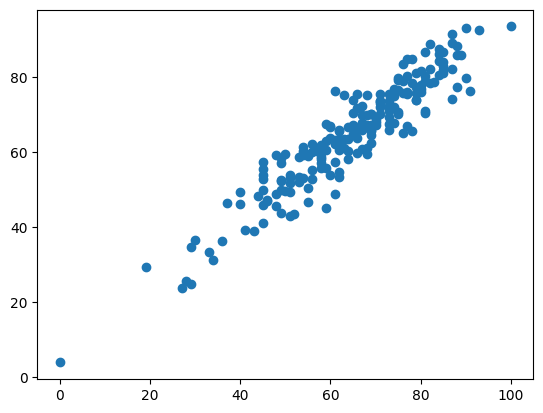

In [36]:
# plot y_pred and y_test
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test,y_pred)
plt.xlable('Actual')
plt.ylable('predicted')


<Axes: xlabel='math_score'>

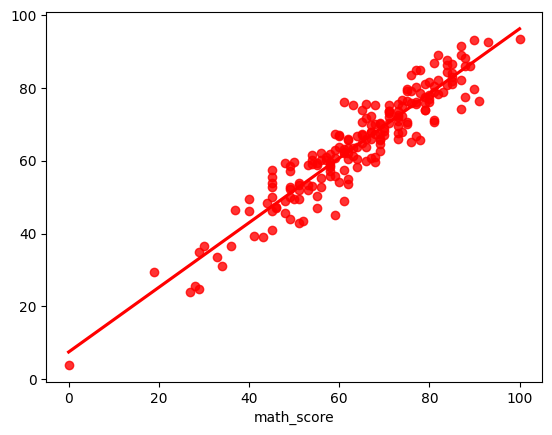

In [37]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [38]:
#Difference between actual and predicted
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504
